<a href="https://colab.research.google.com/github/hawwyo/hr-analytics/blob/main/analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

pd.options.display.float_format = '{:.3f}'.format

In [2]:
#@title
url = 'https://raw.githubusercontent.com/hawwyo/hr-analytics/main/muratov-tobola-dataset.csv'
# url = 'https://raw.githubusercontent.com/hawwyo/hr-analytics/main/cars.csv'
data = pd.read_csv(url).iloc[:, 1:]

In [3]:
#@title
index = [
    '–°—Ä–µ–¥–Ω–µ–µ',
    '–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞',
    '–ú–µ–¥–∏–∞–Ω–∞',
    '–ú–æ–¥–∞',
    '–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ',
    '–î–∏—Å–ø–µ—Ä—Å–∏—è',
    '–≠–∫—Å—Ü–µ—Å—Å',
    '–ê—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å',
    '–ò–Ω—Ç–µ—Ä–≤–∞–ª',
    '–ú–∏–Ω–∏–º—É–º',
    '–ú–∞–∫—Å–∏–º—É–º',
    '–°—É–º–º–∞',
    '–°—á–µ—Ç',
    # '–ù–∞–∏–±–æ–ª—å—à–∏–π',
    # '–ù–∞–∏–º–µ–Ω—å—à–∏–π',
    # '–£—Ä–æ–≤–µ–Ω—å –Ω–∞–¥–µ–∂–Ω–æ—Å—Ç–∏'
]

numerical_columns = [
    'Age',
    'DistanceFromHome',
    'MonthlyIncome',
    'NumCompaniesWorked',
    'TotalWorkingYears',
    'TrainingTimesLastYear',
    'YearsAtCompany',
    'YearsInCurrentRole',
    'YearsSinceLastPromotion',
    'YearsWithCurrManager',

]

quantitive_columns = [
    'Attrition', # —Ü–µ–ª–µ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è
    'BusinessTravel',
    'Department',
    'Education', 
    'EducationField',
    'EnvironmentSatisfaction',
    'Gender',
    'JobInvolvement',
    'JobRole',
    'JobSatisfaction',
    'MaritalStatus',
    'OverTime',
    'PerformanceRating',
    'RelationshipSatisfaction',

]

**–û–ø–∏—Å–∞—Ç–µ–ª—å–Ω–∞—è —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞**

---



–í—Å–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –∏–º–µ—é—Ç –∞—Å–∏–º–º–µ—Ç—Ä–∏—é, –æ—Ç–ª–∏—á–Ω—É—é –æ—Ç 0.

–ü–∞—Ä–∞–º–µ—Ç—Ä MonthlyIncome –∏–º–µ–µ—Ç –æ—á–µ–Ω—å –±–æ–ª—å—à–æ–µ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ.



In [4]:
#@title
def get_descriptive_statistics(column_name):
    column = data[column_name]
    
    values = [ 
        column.mean(), 
        column.sem(), 
        column.median(), 
        column.mode()[0], 
        column.std(), 
        column.var(), 
        column.kurtosis(), 
        column.skew(), 
        column.max() - column.min(), 
        column.min(), 
        column.max(),
        column.sum(),
        column.shape[0]
    ]
    # print(values)
    # print( column.describe() )
    return pd.Series(values, index)
    

descriptive_statistics_result = pd.DataFrame()

for column_name in numerical_columns:
    descriptive_statistics_result[ column_name ] = get_descriptive_statistics(column_name)

descriptive_statistics_result

Age  DistanceFromHome  MonthlyIncome  \
–°—Ä–µ–¥–Ω–µ–µ                   36.924             9.193       6502.931   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞         0.238             0.211        122.793   
–ú–µ–¥–∏–∞–Ω–∞                   36.000             7.000       4919.000   
–ú–æ–¥–∞                      35.000             2.000       2342.000   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ     9.135             8.107       4707.957   
–î–∏—Å–ø–µ—Ä—Å–∏—è                 83.455            65.721   22164857.072   
–≠–∫—Å—Ü–µ—Å—Å                   -0.404            -0.225          1.005   
–ê—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å            0.413             0.958          1.370   
–ò–Ω—Ç–µ—Ä–≤–∞–ª                  42.000            28.000      18990.000   
–ú–∏–Ω–∏–º—É–º                   18.000             1.000       1009.000   
–ú–∞–∫—Å–∏–º—É–º                  60.000            29.000      19999.000   
–°—É–º–º–∞                  54278.000         13513.000    9559309.000   
–°—á–µ—Ç                    1470.000          1470.000       1470.000   

                        NumCompaniesWorked  TotalWorkingYears  \
–°—Ä–µ–¥–Ω–µ–µ                              2.693             11.280   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞                   0.065              0.203   
–ú–µ–¥–∏–∞–Ω–∞                              2.000             10.000   
–ú–æ–¥–∞                                 1.000             10.000   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ               2.498              7.781   
–î–∏—Å–ø–µ—Ä—Å–∏—è                            6.240             60.541   
–≠–∫—Å—Ü–µ—Å—Å                              0.010              0.918   
–ê—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å                      1.026              1.117   
–ò–Ω—Ç–µ—Ä–≤–∞–ª                             9.000             40.000   
–ú–∏–Ω–∏–º—É–º                              0.000              0.000   
–ú–∞–∫—Å–∏–º—É–º                             9.000             40.000   
–°—É–º–º–∞                             3959.000          16581.000   
–°—á–µ—Ç                              1470.000           1470.000   

                        TrainingTimesLastYear  YearsAtCompany  \
–°—Ä–µ–¥–Ω–µ–µ                                 2.799           7.008   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞                      0.034           0.160   
–ú–µ–¥–∏–∞–Ω–∞                                 3.000           5.000   
–ú–æ–¥–∞                                    2.000           5.000   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ                  1.289           6.127   
–î–∏—Å–ø–µ—Ä—Å–∏—è                               1.662          37.534   
–≠–∫—Å—Ü–µ—Å—Å                                 0.495           3.936   
–ê—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å                         0.553           1.765   
–ò–Ω—Ç–µ—Ä–≤–∞–ª                                6.000          40.000   
–ú–∏–Ω–∏–º—É–º                                 0.000           0.000   
–ú–∞–∫—Å–∏–º—É–º                                6.000          40.000   
–°—É–º–º–∞                                4115.000       10302.000   
–°—á–µ—Ç                                 1470.000        1470.000   

                        YearsInCurrentRole  YearsSinceLastPromotion  \
–°—Ä–µ–¥–Ω–µ–µ                              4.229                    2.188   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–∞—è –æ—à–∏–±–∫–∞                   0.094                    0.084   
–ú–µ–¥–∏–∞–Ω–∞                              3.000                    1.000   
–ú–æ–¥–∞                                 2.000                    0.000   
–°—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ               3.623                    3.222   
–î–∏—Å–ø–µ—Ä—Å–∏—è                           13.127                   10.384   
–≠–∫—Å—Ü–µ—Å—Å                              0.477                    3.613   
–ê—Å–∏–º–º–µ—Ç—Ä–∏—á–Ω–æ—Å—Ç—å                      0.917                    1.984   
–ò–Ω—Ç–µ—Ä–≤–∞–ª                            18.000                   15.000   
–ú–∏–Ω–∏–º—É–º                              0.000                    0.000   


In [5]:
#@title
# plt.hist( data['MonthlyIncome'] )

**–®–∫–∞–ª–∞ –ß–µ–¥–¥–æ–∫–∞**

---



|     –ó–Ω–∞—á–µ–Ω–∏–µ    |  –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏—è |
|:---------------:|:--------------:|
|    –æ—Ç 0 –¥–æ 0,3  |  –æ—á–µ–Ω—å —Å–ª–∞–±–∞—è  |
|   –æ—Ç 0,3 –¥–æ 0,5 |     —Å–ª–∞–±–∞—è     |
|  –æ—Ç 0, 5 –¥–æ 0,7 |     —Å—Ä–µ–¥–Ω—è—è    |
|  –æ—Ç 0,7 –¥–æ 0, 9 |     –≤—ã—Å–æ–∫–∞—è    |
|    –æ—Ç 0,9 –¥–æ 1  |  –æ—á–µ–Ω—å –≤—ã—Å–æ–∫–∞—è |

**–ò—Å–ø–æ–ª—å–∑—É—è —à–∫–∞–ª—É –ß–µ–¥–¥–æ–∫–∞, –±—ã–ª–∏ —Å–¥–µ–ª–∞–Ω—ã —Å–ª–µ–¥—É—é—â–∏–µ –≤—ã–≤–æ–¥—ã:**

–°–ª–µ–¥—É—é—â–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã–µ –∏–º–µ—é—Ç –≤—ã—Å–æ–∫—É—é —Å—Ç–µ–ø–µ–Ω—å –∫–æ—Ä—Ä–µ–ª—è—Ü–∏–∏: 
- YearsWithCurrManager –∏ YearsAtCompany
- YearsWithCurrManager –∏ YearsInCurrentRole
- YearsInCurrentRole –∏ YearsAtCompany
- TotalWorkingYears –∏ MonthlyIncome

–í—Ä–µ–º—è —Ä–∞–±–æ—Ç—ã —Å –æ–¥–Ω–∏–º –º–µ–Ω–µ–¥–∂–µ—Ä–æ–º –∏ –Ω–∞ —Ç–µ–∫—É—â–µ–π –¥–æ–ª–∂–Ω–æ—Å—Ç–∏ –∑–∞–≤–∏—Å–∏—Ç –æ—Ç –≤—Ä–µ–º–µ–Ω–∏ —Ä–∞–±–æ—Ç—ã –≤ –∫–æ–º–ø–∞–Ω–∏–∏.

–°—Ç–∞–∂ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞ –≤–ª–∏—è–µ—Ç –Ω–∞ –µ–≥–æ –∑–∞—Ä–∞–±–æ—Ç–Ω—É—é –ø–ª–∞—Ç—É. 

**–ö–æ—Ä—Ä–µ–ª—è—Ü–∏–æ–Ω–Ω–∞—è –º–∞—Ç—Ä–∏—Ü–∞:**

---



In [6]:
#@title
data[numerical_columns].corr()

Age  DistanceFromHome  MonthlyIncome  \
Age                      1.000            -0.002          0.498   
DistanceFromHome        -0.002             1.000         -0.017   
MonthlyIncome            0.498            -0.017          1.000   
NumCompaniesWorked       0.300            -0.029          0.150   
TotalWorkingYears        0.680             0.005          0.773   
TrainingTimesLastYear   -0.020            -0.037         -0.022   
YearsAtCompany           0.311             0.010          0.514   
YearsInCurrentRole       0.213             0.019          0.364   
YearsSinceLastPromotion  0.217             0.010          0.345   
YearsWithCurrManager     0.202             0.014          0.344   

                         NumCompaniesWorked  TotalWorkingYears  \
Age                                   0.300              0.680   
DistanceFromHome                     -0.029              0.005   
MonthlyIncome                         0.150              0.773   
NumCompaniesWorked                    1.000              0.238   
TotalWorkingYears                     0.238              1.000   
TrainingTimesLastYear                -0.066             -0.036   
YearsAtCompany                       -0.118              0.628   
YearsInCurrentRole                   -0.091              0.460   
YearsSinceLastPromotion              -0.037              0.405   
YearsWithCurrManager                 -0.110              0.459   

                         TrainingTimesLastYear  YearsAtCompany  \
Age                                     -0.020           0.311   
DistanceFromHome                        -0.037           0.010   
MonthlyIncome                           -0.022           0.514   
NumCompaniesWorked                      -0.066          -0.118   
TotalWorkingYears                       -0.036           0.628   
TrainingTimesLastYear                    1.000           0.004   
YearsAtCompany                           0.004           1.000   
YearsInCurrentRole                      -0.006           0.759   
YearsSinceLastPromotion                 -0.002           0.618   
YearsWithCurrManager                    -0.004           0.769   

                         YearsInCurrentRole  YearsSinceLastPromotion  \
Age                                   0.213                    0.217   
DistanceFromHome                      0.019                    0.010   
MonthlyIncome                         0.364                    0.345   
NumCompaniesWorked                   -0.091                   -0.037   
TotalWorkingYears                     0.460                    0.405   
TrainingTimesLastYear                -0.006                   -0.002   
YearsAtCompany                        0.759                    0.618   
YearsInCurrentRole                    1.000                    0.548   
YearsSinceLastPromotion               0.548                    1.000   
YearsWithCurrManager                  0.714                    0.510   

                         YearsWithCurrManager  
Age                                     0.202  
DistanceFromHome                        0.014  
MonthlyIncome                           0.344  
NumCompaniesWorked                     -0.110  
TotalWorkingYears                       0.459  
TrainingTimesLastYear                  -0.004  
YearsAtCompany                          0.769  
YearsInCurrentRole                      0.714  
YearsSinceLastPromotion                 0.510  
YearsWithCurrManager                    1.000

–ë–æ–ª—å—à–∏–Ω—Å—Ç–≤–æ –≤—ã–±–æ—Ä–æ–∫ —Å–æ–¥–µ—Ä–∂–∞—Ç –Ω–µ–ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω—ã–µ –∏–∑–º–µ—Ä–µ–Ω–∏—è (–∞–Ω–æ–º–∞–ª–∏–∏). 

–ü—Ä–∏ –Ω–∞–∏–≤—ã—Å—à–µ–º —É—Ä–æ–≤–Ω–µ –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è –æ—Ç—Å—É—Ç—Å–≤—É—é—Ç "–≤—ã–±—Ä–æ—Å—ã".

–í–µ—Ä—Ö–Ω–∏–π —É—Å –¥–ª–∏–Ω–Ω–µ–µ –Ω–∏–∂–Ω–µ–≥–æ, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –∏–º–µ–µ—Ç –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –∞—Å–∏–º–º–µ—Ç—Ä–∏—é.

–ß–µ–º –±–æ–ª—å—à–µ —É—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∞, —Ç–µ–º –±–æ–ª—å—à–µ –µ–≥–æ –º–µ–¥–∏–∞–Ω–Ω–∞—è –∑–∞—Ä–∞–±–æ—Ç–Ω–∞—è –ø–ª–∞—Ç–∞.

–ü—Ä–∏ —Ç–æ–º, –≤ –∫–∞–∂–¥–æ–π –≤—ã–±–æ—Ä–∫–µ —Å—É—â–µ—Å—Ç–≤—É—é—Ç —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–∏ —Å –≤—ã—Å–æ–∫–æ–π –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç–æ–π.

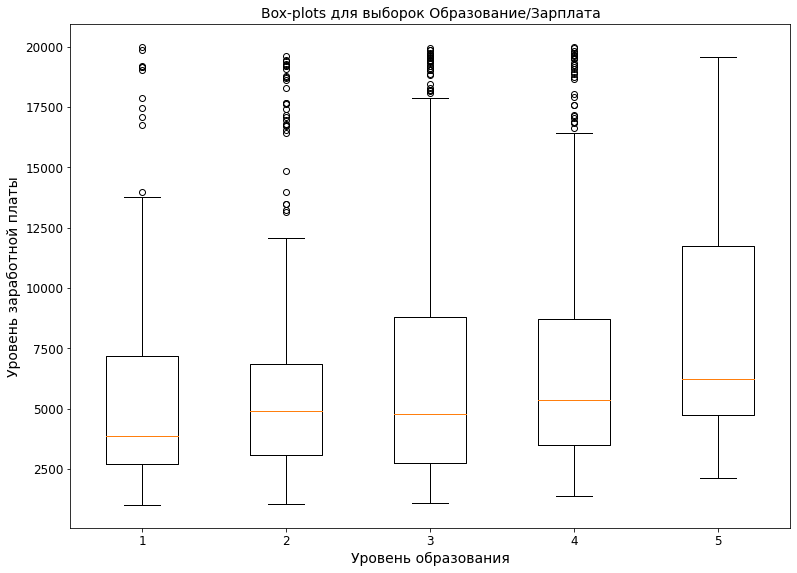

In [7]:
#@title 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

categorical = 'Education'
quantitive = 'MonthlyIncome'

education_values = data[categorical].unique() # 1 - 5

# get samples
samples = {}
for v in education_values:
    query = data[
        data[categorical] == v
    ][quantitive]
    
    samples[v] = query
    # print(v, query.shape)
sorted_samples = {k: v for k, v in sorted(samples.items(), key=lambda item: item[0])}

# visualisation
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(sorted_samples.values())

plt.title('Box-plots –¥–ª—è –≤—ã–±–æ—Ä–æ–∫ –û–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ/–ó–∞—Ä–ø–ª–∞—Ç–∞', fontsize=14)
plt.xlabel('–£—Ä–æ–≤–µ–Ω—å –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è', fontsize=14)
plt.ylabel('–£—Ä–æ–≤–µ–Ω—å –∑–∞—Ä–∞–±–æ—Ç–Ω–æ–π –ø–ª–∞—Ç—ã', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


# for sample in sorted_samples:
#     plt.title(sample)
#     plt.subplot(2, 3, sample)
#     plt.boxplot(samples[sample])


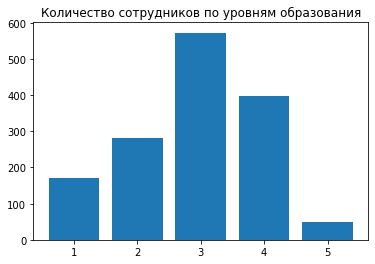

In [8]:
#@title
x = [i for i in range(1, 5+1)]
y = [len(sorted_samples[i]) for i in range(1, 5+1)]
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –ø–æ —É—Ä–æ–≤–Ω—è–º –æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏—è')
plt.bar(x, y)
plt.show()

In [9]:
#@title
# plt.hist( data['Age'] ) 

norm_data = np.random.normal(data['Age'].mean(), data['Age'].std(), data['Age'].shape[0])
# norm_data = stats.norm.rvs(data['Age'].mean(), data['Age'].std(), 100)

plt.figure(figsize=(20, 10))
plt.subplot(221)
plt.hist(norm_data)

plt.subplot(222)

x = np.linspace(data['Age'].min(), data['Age'].max(), )
y = stats.norm(data['Age'].mean(), data['Age'].std()).pdf(x)
plt.plot(x, y)
plt.hist(data['Age'], density=True)

plt.subplot(223)
plt.hist(data[data['Attrition'] == 'Yes']['Age'])

plt.subplot(224)
plt.hist(data[data['Attrition'] == 'No']['Age'])

print( stats.chisquare(data['Age']) )
plt.show()
# !pip list | grep scipy

Power_divergenceResult(statistic=3320.228011348981, pvalue=1.5770798053678106e-144)


–ü–æ—Å—Ç—Ä–æ–∏–≤ –Ω–∞ –æ–¥–Ω–æ–º –≥—Ä–∞—Ñ–∏–∫–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω—ã—Ö –∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –º–æ–∂–Ω–æ —Å—Ä–∞–∑—É —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–æ–≤ DistanceFromHome, MonthlyIncome, NumCompaniesWorked, TotalWorkingYears, TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion –∏ YearsWIthCurrManager –∏–º–µ—é—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, –æ—Ç–ª–∏—á–Ω–æ–µ –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ. 

–î–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±–ª–∏–∑–æ—Å—Ç–∏ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ Age –∫ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–º—É, –≤–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è –∫—Ä–∏—Ç–µ—Ä–∏–µ–º —Å–æ–≥–ª–∞—Å–∏—è —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç (–∫—Ä–∏—Ç–µ—Ä–∏–π –ü–∏—Ä—Å–æ–Ω–∞).

–†–∞–∑–¥–µ–ª–∏–º –≤—Å—é –≤—ã–±–æ—Ä–∫—É –Ω–∞ 11 –∏–Ω—Ç–µ—Ä–≤–∞–ª–æ–≤. –ü–æ—Å—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—ã –≤ –∫–∞–∂–¥–æ–º –∏–Ω—Ç–µ—Ä–≤–∞–ª–µ, –∞ —Ç–∞–∫–∂–µ –æ–∂–∏–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã. –ü—Ä–µ–¥–ø–æ–ª–æ–∂–∏–º, —á—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–µ —Ä–∞—Å–ø—Ä–µ–¥–∂–µ–ª–µ–Ω–∏–µ –∏–º–µ–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ = 36.924, —Å—Ä–µ–¥–Ω–µ–∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ = 9.135

| –ò–Ω—Ç–µ—Ä–≤–∞–ª—ã: | –ß–∞—Å—Ç–æ—Ç—ã | –û–∂–∏–¥–∞–µ–º—ã–µ —á–∞—Å—Ç–æ—Ç—ã | –•–∏ –∫–≤–∞–¥—Ä–∞—Ç |
|:----------:|:-------:|:-----------------:|:----------:|
|  18 --- 21 |    41   |       47.06       |    0.78    |
|  22 --- 25 |    82   |       95.15       |    1.82    |
|  26 --- 29 |   203   |       159.29      |    12.0    |
|  30 --- 33 |   248   |       220.81      |    3.35    |
|  34 --- 37 |   274   |       253.46      |    1.66    |
|  38 --- 41 |   197   |       240.92      |    8.01    |
|  42 --- 45 |   152   |       189.62      |    7.46    |
|  46 --- 49 |   100   |       123.58      |    4.50    |
|  50 --- 53 |    86   |       66.69       |    5.59    |
|  54 --- 57 |    58   |       29.80       |    26.70   |
|  58 --- 61 |    29   |       11.02       |    29.30   |
|    –°—É–º–º–∞ = |   1470  |      1437.39      |   101.176  |

–í—ã–±–æ—Ä–æ—á–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Ä–∞–≤–Ω–æ 101.176

–ö–≤–∞–Ω—Ç–∏–ª—å –ø–æ—Ä—è–¥–∫–∞ 0.95 —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è ùúí^2 —Å (11 - 2 - 1) —Å—Ç–µ–ø–µ–Ω—è–º–∏ —Å–≤–æ–±–æ–¥—ã = 15.507

–¢–æ–≥–¥–∞, —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞ Age –æ—Ç–ª–∏—á–Ω–æ –æ—Ç –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ.

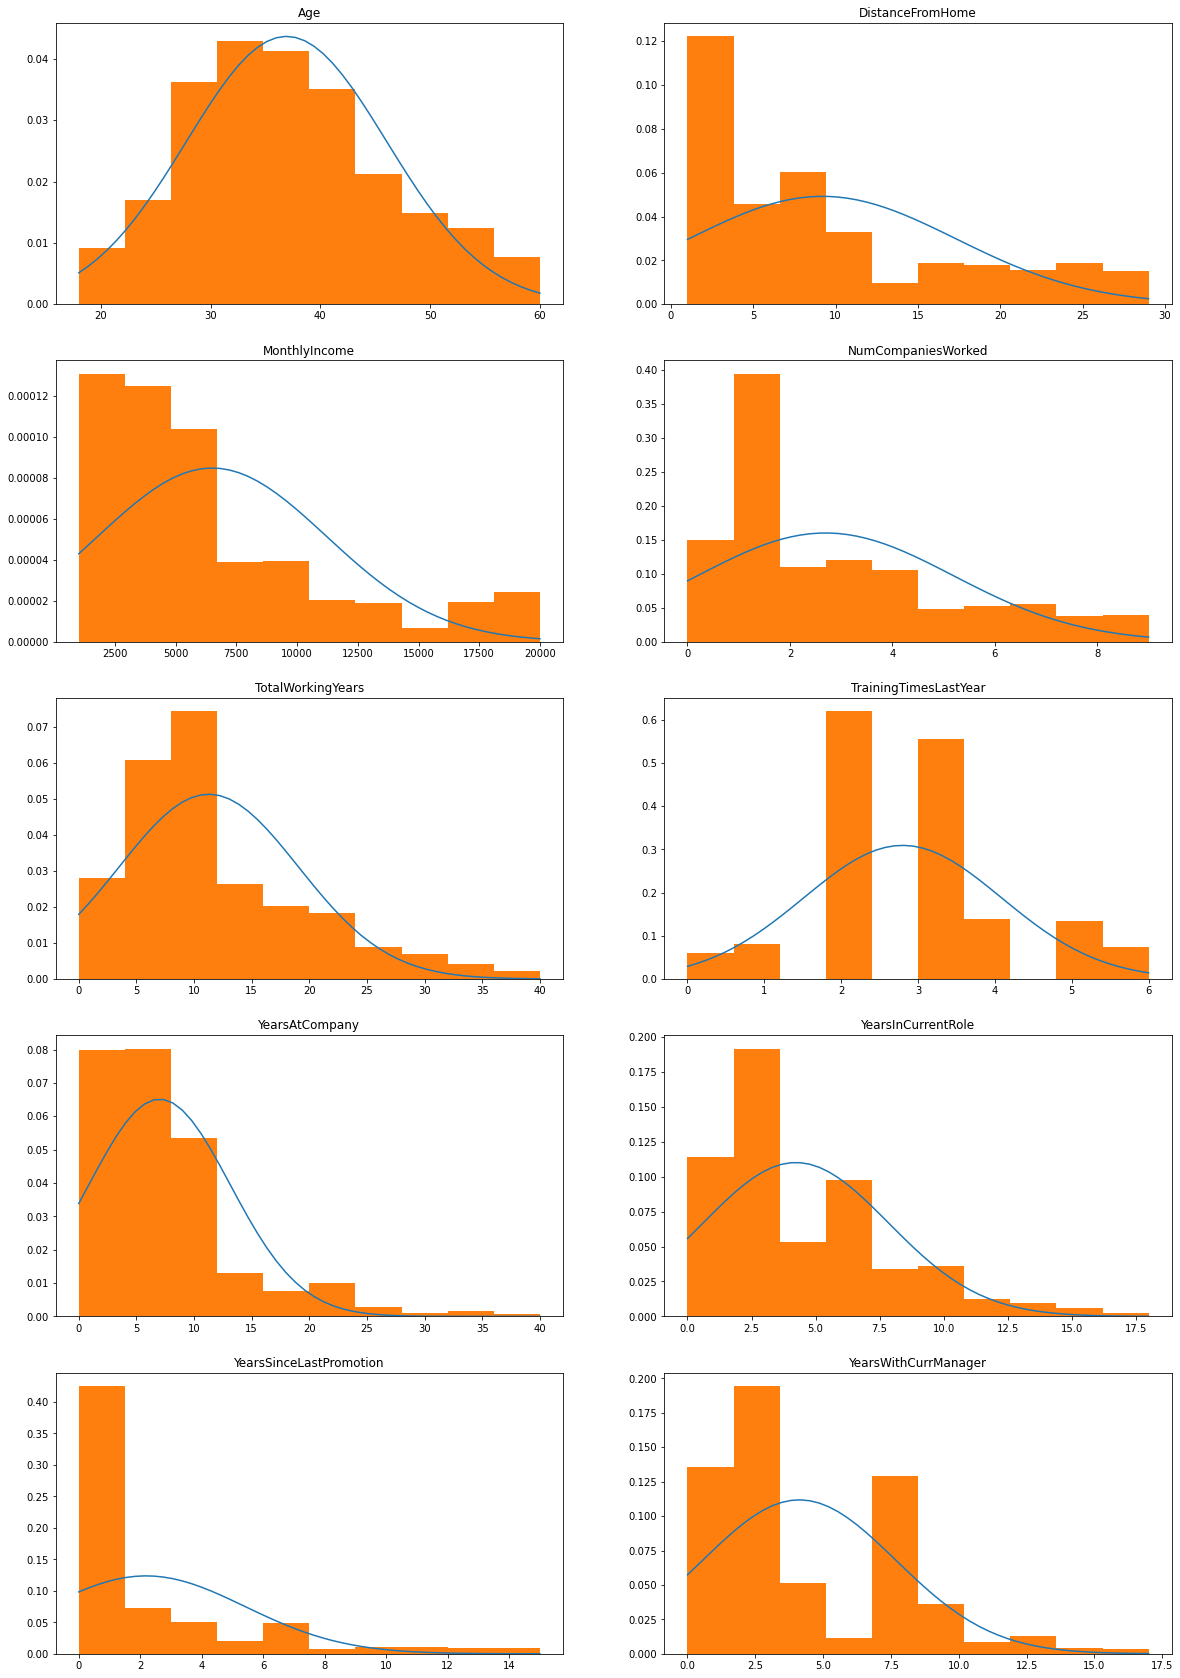

In [10]:
#@title
plt.figure(figsize=(20, 30))

n = 5; m = 2

cur = 1
for column_name in numerical_columns:
    plt.subplot( n, m, cur )
    plt.title( column_name )
    x = np.linspace(data[column_name].min(), data[column_name].max(), )
    y = stats.norm(data[column_name].mean(), data[column_name].std()).pdf(x)
    plt.plot(x, y)
    plt.hist(data[column_name], density=True)
    # plt.hist(data[column_name])
    cur += 1




In [11]:
#@title
num_groups = math.ceil(0 + 3.322 * math.log10( data['Age'].shape[0] ))

count = [0] * 100
for age in data['Age']:
    count[age] += 1

mn = data['Age'].min()
groups = [0] * num_groups
groups_len = math.ceil((data['Age'].max() - data['Age'].min()) / num_groups)
for age in data['Age']:
    groups[(age - mn) // groups_len] += 1

print(num_groups, groups_len)

expected_f = [0] * num_groups
norm_distr = stats.norm( data['Age'].mean(), data['Age'].std() )

for i in range(num_groups):
    expected_f[i] = data['Age'].shape[0] * ( norm_distr.cdf( mn + (i + 1) * groups_len ) - norm_distr.cdf(mn + i * groups_len) )
    # expected_f[i] = round( expected_f[i] )

print(sum(expected_f))

# for i in expected_f:
#     print( f'{i:.2f}' )

print( expected_f )

chi_value = 0
for i in range(num_groups):
    chi_value += ((groups[i] - expected_f[i]) ** 2) / expected_f[i]
    print(  f'{((groups[i] - expected_f[i]) ** 2) / expected_f[i]:.3}'   )

chi2 = stats.chi2(num_groups - 3)

print(chi_value, chi2.ppf(0.95))

print(stats.normaltest(data['Age']))

11 4
1437.391575450313
[47.05728970126838, 95.14526972764448, 159.28735339178576, 220.81165873536602, 253.46472941085133, 240.91919011873435, 189.6191925265072, 123.57885801560042, 66.68779199726417, 29.797071747382624, 11.023170077908235]
0.78
1.82
12.0
3.35
1.66
8.01
7.46
4.5
5.59
26.7
29.3
101.1755431026486 15.50731305586545
NormaltestResult(statistic=54.68430031753582, pvalue=1.3349194556165794e-12)


In [12]:
#@title
from scipy import stats
import numpy as np

# maybe preprocess data before CHI**2?

for column in numerical_columns[:]:
    # k2, p = stats.normaltest(data[column])
    # print(f'{k2} {p}') 0.05
    # val = stats.chisquare(np.random.normal(data[column].mean(), data[column].std(), 20000)) # p = 0.05
    # val = stats.chisquare(data[column] )
    val = stats.normaltest(data[column])
    print( val )
    # print(f'{column} {val.pvalue:.90f}')

# plt.hist(np.random.normal(data['Age'].mean(), data['Age'].std(), 200000) )

# print('pizdec not normal distribution?')
stats.kstest( data['Age'].values, 'norm' )

NormaltestResult(statistic=54.68430031753582, pvalue=1.3349194556165794e-12)
NormaltestResult(statistic=168.69438999527182, pvalue=2.3360312516323686e-37)
NormaltestResult(statistic=305.3342592999294, pvalue=4.9831966397226114e-67)
NormaltestResult(statistic=183.06154400817354, pvalue=1.7729267563705434e-40)
NormaltestResult(statistic=233.7378580236686, pvalue=1.755775660131454e-51)
NormaltestResult(statistic=76.71874219062896, pvalue=2.1914764299034e-17)
NormaltestResult(statistic=518.18934607392, pvalue=2.996492600005795e-113)
NormaltestResult(statistic=164.07304432135786, pvalue=2.3550010824485376e-36)
NormaltestResult(statistic=564.3228783257148, pvalue=2.876364802180292e-123)
NormaltestResult(statistic=134.347685538225, pvalue=6.710745319247093e-30)


KstestResult(statistic=1.0, pvalue=0.0)

In [13]:
#@title
#plt.figure(figsize=(10, 10))
for column in numerical_columns[5:6]:
    #print(data[column].value_counts())
    plt.bar(
        data[column].value_counts().keys(),
        data[column].value_counts()
    )

In [14]:
#@title
quantitive_column_unique_values = {}
for column in quantitive_columns:
    quantitive_column_unique_values[column] = data[column].unique()
    print(column)
    print(data[column].unique(), end='\n\n')

#quantitive_column_unique_values
"""
Attrition Yes
BusinessTravel Travel_Rarely
BusinessTravel Travel_Frequently
Department Sales
Department Research & Development
Education 2
Education 1
Education 4
Education 3
EducationField Life Sciences
EducationField Other
EducationField Medical
EducationField Marketing
EducationField Technical Degree
EnvironmentSatisfaction 2
EnvironmentSatisfaction 3
EnvironmentSatisfaction 4
Gender Female
JobInvolvement 3
JobInvolvement 2
JobInvolvement 4
JobRole Sales Executive
JobRole Research Scientist
JobRole Laboratory Technician
JobRole Manufacturing Director
JobRole Healthcare Representative
JobRole Manager
JobRole Sales Representative
JobRole Research Director
JobSatisfaction 4
JobSatisfaction 2
JobSatisfaction 3
MaritalStatus Single
MaritalStatus Married
OverTime Yes
PerformanceRating 3
RelationshipSatisfaction 1
RelationshipSatisfaction 4
RelationshipSatisfaction 2
"""

Attrition
['Yes' 'No']

BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']

Department
['Sales' 'Research & Development' 'Human Resources']

Education
[2 1 4 3 5]

EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']

EnvironmentSatisfaction
[2 3 4 1]

Gender
['Female' 'Male']

JobInvolvement
[3 2 4 1]

JobRole
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']

JobSatisfaction
[4 2 3 1]

MaritalStatus
['Single' 'Married' 'Divorced']

OverTime
['Yes' 'No']

PerformanceRating
[3 4]

RelationshipSatisfaction
[1 4 2 3]



'\nAttrition Yes\nBusinessTravel Travel_Rarely\nBusinessTravel Travel_Frequently\nDepartment Sales\nDepartment Research & Development\nEducation 2\nEducation 1\nEducation 4\nEducation 3\nEducationField Life Sciences\nEducationField Other\nEducationField Medical\nEducationField Marketing\nEducationField Technical Degree\nEnvironmentSatisfaction 2\nEnvironmentSatisfaction 3\nEnvironmentSatisfaction 4\nGender Female\nJobInvolvement 3\nJobInvolvement 2\nJobInvolvement 4\nJobRole Sales Executive\nJobRole Research Scientist\nJobRole Laboratory Technician\nJobRole Manufacturing Director\nJobRole Healthcare Representative\nJobRole Manager\nJobRole Sales Representative\nJobRole Research Director\nJobSatisfaction 4\nJobSatisfaction 2\nJobSatisfaction 3\nMaritalStatus Single\nMaritalStatus Married\nOverTime Yes\nPerformanceRating 3\nRelationshipSatisfaction 1\nRelationshipSatisfaction 4\nRelationshipSatisfaction 2\n'

In [15]:
#@title
n_data = data[:]
# n_data is data should be false, this means that created deep copy

for column_name, unique_values in quantitive_column_unique_values.items():
    column_index = n_data.columns.get_loc(column_name)
    for unique_value in unique_values[:-1]:
        print(column_name, unique_value)
        
        n_col = data[column_name] == unique_value
        n_col_name = f'{column_name}_{unique_value}'
        n_data.insert(
            column_index + 1,
            n_col_name,
            n_col.astype(int)
        )
        column_index += 1
    #break
n_data

Attrition Yes
BusinessTravel Travel_Rarely
BusinessTravel Travel_Frequently
Department Sales
Department Research & Development
Education 2
Education 1
Education 4
Education 3
EducationField Life Sciences
EducationField Other
EducationField Medical
EducationField Marketing
EducationField Technical Degree
EnvironmentSatisfaction 2
EnvironmentSatisfaction 3
EnvironmentSatisfaction 4
Gender Female
JobInvolvement 3
JobInvolvement 2
JobInvolvement 4
JobRole Sales Executive
JobRole Research Scientist
JobRole Laboratory Technician
JobRole Manufacturing Director
JobRole Healthcare Representative
JobRole Manager
JobRole Sales Representative
JobRole Research Director
JobSatisfaction 4
JobSatisfaction 2
JobSatisfaction 3
MaritalStatus Single
MaritalStatus Married
OverTime Yes
PerformanceRating 3
RelationshipSatisfaction 1
RelationshipSatisfaction 4
RelationshipSatisfaction 2


Age Attrition  Attrition_Yes     BusinessTravel  \
0      41       Yes              1      Travel_Rarely   
1      49        No              0  Travel_Frequently   
2      37       Yes              1      Travel_Rarely   
3      33        No              0  Travel_Frequently   
4      27        No              0      Travel_Rarely   
...   ...       ...            ...                ...   
1465   36        No              0  Travel_Frequently   
1466   39        No              0      Travel_Rarely   
1467   27        No              0      Travel_Rarely   
1468   49        No              0  Travel_Frequently   
1469   34        No              0      Travel_Rarely   

      BusinessTravel_Travel_Rarely  BusinessTravel_Travel_Frequently  \
0                                1                                 0   
1                                0                                 1   
2                                1                                 0   
3                                0                                 1   
4                                1                                 0   
...                            ...                               ...   
1465                             0                                 1   
1466                             1                                 0   
1467                             1                                 0   
1468                             0                                 1   
1469                             1                                 0   

                  Department  Department_Sales  \
0                      Sales                 1   
1     Research & Development                 0   
2     Research & Development                 0   
3     Research & Development                 0   
4     Research & Development                 0   
...                      ...               ...   
1465  Research & Development                 0   
1466  Research & Development                 0   
1467  Research & Development                 0   
1468                   Sales                 1   
1469  Research & Development                 0   

      Department_Research & Development  DistanceFromHome  ...  \
0                                     0                 1  ...   
1                                     1                 8  ...   
2                                     1                 2  ...   
3                                     1                 3  ...   
4                                     1                 2  ...   
...                                 ...               ...  ...   
1465                                  1                23  ...   
1466                                  1                 6  ...   
1467                                  1                 4  ...   
1468                                  0                 2  ...   
1469                                  1                 8  ...   

      RelationshipSatisfaction  RelationshipSatisfaction_1  \
0                            1                           1   
1                            4                           0   
2                            2                           0   
3                            3                           0   
4                            4                           0   
...                        ...                         ...   
1465                         3                           0   
1466                         1                           1   
1467                         2                           0   
1468                         4                           0   
1469                         1                           1   

      RelationshipSatisfaction_4  RelationshipSatisfaction_2  \
0                              0                           0   
1                              1                           0   
2                              0                           1   
3                              0                           0 

**3.1	–£–∫–∞–∂–∏—Ç–µ –≤—Å–µ –≤—ã–±—Ä–æ—Å—ã (¬´–¥–∏–∫–∏–µ –∏–∑–º–µ—Ä–µ–Ω–∏—è¬ª). –ü—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–π—Ç–µ –∏ —É–∫–∞–∂–∏—Ç–µ, –∫–∞–∫ –æ–Ω–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—é—Ç—Å—è –≤ –∞–Ω–∞–ª–∏–∑–µ**

–í —Ü–µ–ª–æ–º –ø–æ –∫–∞–∂–¥–æ–º—É –ø—Ä–∏–∑–Ω–∞–∫—É –Ω–∞–±–ª—é–¥–∞–µ—Ç—Å—è –Ω–µ–±–æ–ª—å—à–æ–µ –∫–æ–ª–∏—á–µ—Å–≤–æ –≤—ã–±—Ä–æ—Å–æ–≤.

–£ –ø—Ä–∏–∑–Ω–∞–∫–∞ TrainingTimesLastYear –º–µ–¥–∏–∞–Ω–∞ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å 3-–∏–º –∫–≤–∞—Ä—Ç–∏–ª–µ–º. 75% —Å–æ—Ç—Ä—É–¥–Ω–∏–∫–æ–≤ –ø—Ä–æ—Ö–æ–¥—è—Ç –∫—É—Ä—Å—ã –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü–∏–∏ 3 —Ä–∞–∑–∞ –≤ –≥–æ–¥.  

–ü—Ä–∏–∑–Ω–∞–∫ MonthlyIncome –∏–º–µ–µ—Ç –Ω–∞–∏–±–æ–ª—å—à–∏–π –ø—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤.

–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤ –∏–º–µ—é—Ç –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é –∞—Å–∏–º–º–µ—Ç—Ä–∏—é. 

–ü—Ä–∏–∑–Ω–∞–∫ Age –≤–∏–∑—É–∞–ª—å–Ω–æ –∏–º–µ–µ—Ç —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –±–µ–∑ –∞—Å–∏–º–º–µ—Ç—Ä–∏–∏.

|         –ü—Ä–∏–∑–Ω–∞–∫         | –ü—Ä–æ—Ü–µ–Ω—Ç –≤—ã–±—Ä–æ—Å–æ–≤ |
|:-----------------------:|:----------------:|
|           Age           |      0.00 %      |
|     DistanceFromHome    |      0.00 %      |
|      MonthlyIncome      |      7.76 %      |
|    NumCompaniesWorked   |      0.00 %      |
|    TotalWorkingYears    |      3.13 %      |
|  TrainingTimesLastYear  |      0.00 %      |
|      YearsAtCompany     |      6.33 %      |
|    YearsInCurrentRole   |      0.41 %      |
| YearsSinceLastPromotion |      4.90 %      | 
|   YearsWithCurrManager  |      0.48 %      |

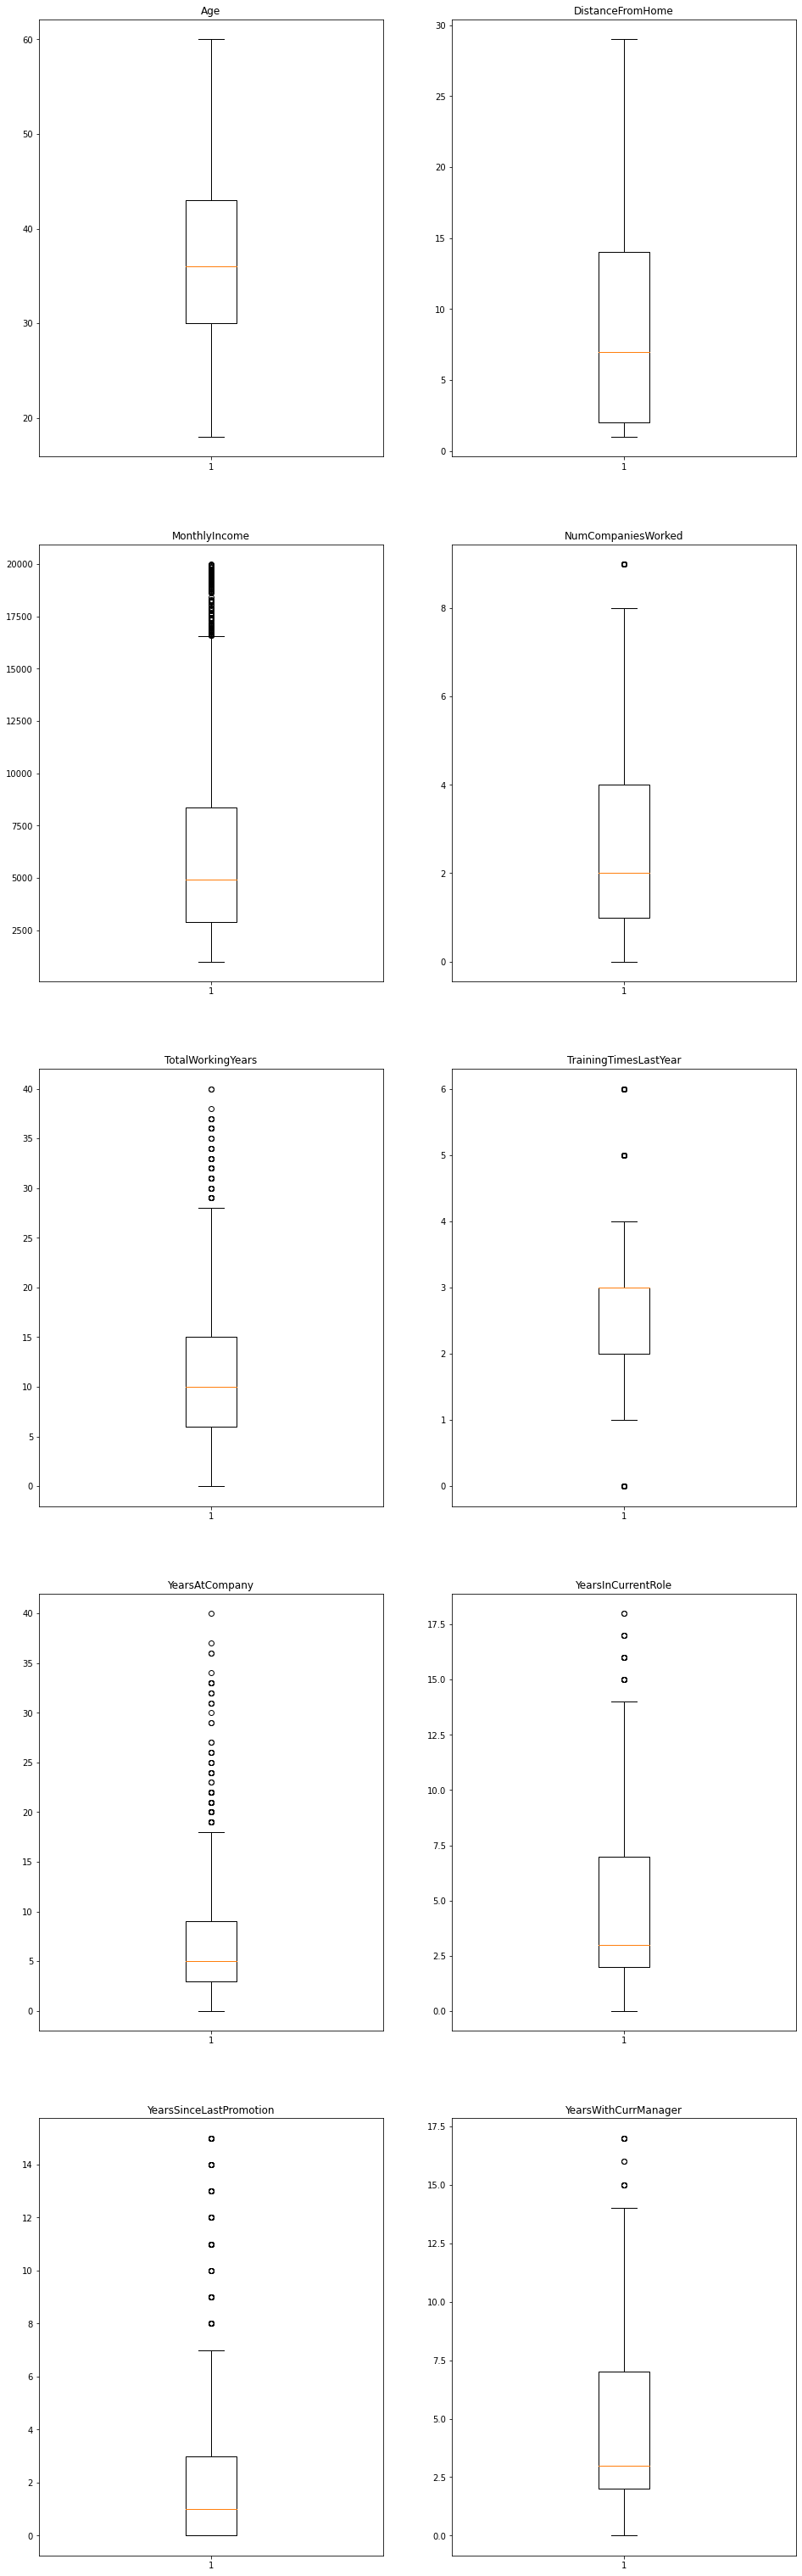

In [16]:
#@title
# for column_name in quantitive_columns:
#     print( data[column_name].value_counts() )

# plt.boxplot( data['TrainingTimesLastYear'] )

plt.figure(figsize=(16, 55))
cnt = 1
for column_name in numerical_columns:
    plt.subplot(5, 2, cnt)
    plt.boxplot( data[column_name] )
    plt.title(column_name)

    cnt += 1
    
plt.show()

In [17]:
#@title
bad_values = {}

for column_name in numerical_columns:
    q75, q25 = data[column_name].quantile([0.75, 0.25])
    r = (q75 - q25 + 1) * 1.5
    mx_good = q75 + r
    mn_good = q25 - r

    bad_values[column_name] = data[ (data[column_name] > mx_good) | (data[column_name] < mn_good) ]
    
    # print(q25, q75, column_name)

OVERALL = 1470
for k in bad_values:
    print(f'{k} {(bad_values[k].shape[0] / OVERALL * 100):.2f} %')
# bad_values['MonthlyIncome']['TotalWorkingYears'].value_counts()

Age 0.00 %
DistanceFromHome 0.00 %
MonthlyIncome 7.76 %
NumCompaniesWorked 0.00 %
TotalWorkingYears 3.13 %
TrainingTimesLastYear 0.00 %
YearsAtCompany 6.33 %
YearsInCurrentRole 0.41 %
YearsSinceLastPromotion 4.90 %
YearsWithCurrManager 0.48 %


In [18]:
#@title
with pd.ExcelWriter('output.xlsx') as writer:  
    n_data.to_excel(writer, sheet_name='Add_new_variables')
    for k in bad_values:
        bad_values[k].to_excel(writer, sheet_name=f'{k}_anomaly')

In [135]:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_latex.html

from scipy.stats import chi2_contingency
import math

def get_contigency(a, b):
    contingency = pd.crosstab(data[a], data[b])
    chi_square_test = chi2_contingency(contingency)
    return contingency, chi_square_test

def get_pearson_coef(chi, n=1470):
    chi2 = chi[1][0]
    return math.sqrt(
        chi2 / (chi2 + n)
    )
    
# TODO: REMOVE ANOMALIES
# for i in quantitive_columns:
#     for j in quantitive_columns:
#         table, chi = get_contigency(i, j)
#         tables.append(table)
#         if chi[1] < 0.06 and i < j and i != 'Attrition' and j != 'Attrition':
#             print(i)
#             print(j)
#             print(chi[1], end="\n\n\n")
        

# –ù–µ–∑–∞–≤–∏—Å–∏–º—ã–µ
department_env_satus = get_contigency('Department', 'EnvironmentSatisfaction')
male_attrition = get_contigency('Gender', 'Attrition')
job_inv_mar_status = get_contigency('JobInvolvement', 'MaritalStatus')

# –ó–∞–≤–∏—Å–∏–º—ã–µ
over_time_env = get_contigency('OverTime', 'EnvironmentSatisfaction')
job_role_gender = get_contigency('JobRole', 'Gender')
job_role_marital_status = get_contigency('JobRole', 'MaritalStatus')

dependent = [over_time_env, job_role_gender, job_role_marital_status]
for i in dependent:
    C = get_pearson_coef(i)
    print(f'C = {C}', end="\n\n")

C = 0.07451517948832284

C = 0.10386072547377655

C = 0.1340849335209317

